## Module 1: Feture selection

In this module, first I hae trained a dense neural network model on wole dataset.

After that, I have implemented two feature selection methods and extracted common features from the whole dataset. On these common features, I have trained dense neural network and SVM model. 



In [0]:
import pickle
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,f1_score, recall_score,roc_curve, auc
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import json
import csv
import time 

In [0]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from keras import regularizers
from sklearn import metrics
from keras.models import Sequential
from keras.layers.core import Dense, Activation,Dropout
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D


Using TensorFlow backend.


In [0]:
def gen_csv(test_id,true_values, name):
    soln = pd.DataFrame( true_values, test_id,columns = ["target"])
    print(soln.head(5))
    soln.to_csv(name +".csv",index_label = ["ID_code"])
    print("-------------Done-----------------")
    

In [0]:
file1 = "https://drive.google.com/open?id=1PI8qVYbbbZUFlbXFduL4gkAVCFl6BW1U"
file2 = "https://drive.google.com/open?id=1in58RJdqcZc-RxxkhgV2n6JGjbiEVyGf"

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link_text = file1 # The shareable link
fluff, id_1 = link_text.split('=')
print (id_1)

link_text = file2 # The shareable link
fluff, id_2 = link_text.split('=')
print (id_2)

downloaded = drive.CreateFile({'id':id_1}) 
downloaded.GetContentFile("train.csv")
downloaded = drive.CreateFile({'id':id_2}) 
downloaded.GetContentFile("test.csv")  

     |████████████████████████████████| 993kB 4.9MB/s 
1PI8qVYbbbZUFlbXFduL4gkAVCFl6BW1U
1in58RJdqcZc-RxxkhgV2n6JGjbiEVyGf


In [0]:
df = pd.read_csv("train.csv")

In [0]:
test_df = pd.read_csv("test.csv")
test_id = np.array(test_df.iloc[:,0])

In [0]:
df.head(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [0]:
test_df.head(5)

In [0]:
df.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
var_6      0
var_7      0
var_8      0
var_9      0
var_10     0
var_11     0
var_12     0
var_13     0
var_14     0
var_15     0
var_16     0
var_17     0
var_18     0
var_19     0
var_20     0
var_21     0
var_22     0
var_23     0
var_24     0
var_25     0
var_26     0
var_27     0
          ..
var_170    0
var_171    0
var_172    0
var_173    0
var_174    0
var_175    0
var_176    0
var_177    0
var_178    0
var_179    0
var_180    0
var_181    0
var_182    0
var_183    0
var_184    0
var_185    0
var_186    0
var_187    0
var_188    0
var_189    0
var_190    0
var_191    0
var_192    0
var_193    0
var_194    0
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [0]:
def add_feature(df, cols):
  
    df['sum'] = df[cols].sum(axis=1)  
    df['min'] = df[cols].min(axis=1)
    df['max'] = df[cols].max(axis=1)
    df['mean'] = df[cols].mean(axis=1)
    
    df['std'] = df[cols].std(axis=1)
    df['skew'] = df[cols].skew(axis=1)
    df['kurt'] = df[cols].kurtosis(axis=1)
    df['med'] = df[cols].median(axis=1)

In [0]:
x_col = df.iloc[:,2:]

In [0]:
x_col.head(5)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [0]:
add_feature(x_col , x_col.columns)

In [0]:
x_col.head(5)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_198,var_199,sum,min,max,mean,std,skew,kurt,med
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,12.7803,-1.0914,1456.3182,-21.4494,43.1127,7.281591,9.331540,0.101580,1.331023,6.77040
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,18.3560,1.9518,1415.3636,-47.3797,40.5632,7.076818,10.336130,-0.351734,4.110215,7.22315
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,14.7222,0.3965,1240.8966,-22.4038,33.8820,6.204483,8.753387,-0.056957,0.546438,5.89940
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,17.9697,-8.9996,1288.2319,-35.1659,38.1015,6.441159,9.594064,-0.480116,2.630499,6.70260
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,17.9974,-8.8104,1354.2310,-65.4863,41.1037,6.771155,11.287122,-1.463426,9.787399,6.94735


In [0]:
# scaler = MinMaxScaler()
scaler = StandardScaler()
features = scaler.fit_transform(x_col)

# features = x_col

In [0]:
features.shape

(200000, 208)

In [0]:
target = df["target"]

In [0]:
target.head(5)

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [0]:
# la_enc = LabelEncoder()
# enc_target = la_enc.fit_transform(target)
# target_final = to_categorical(enc_target)

### without Feature Selection

In [0]:
results_ = {}

In [0]:
la_enc = LabelEncoder()
enc_target = la_enc.fit_transform(target)
target_conv = to_categorical(enc_target)

total_activation = ["relu", "sigmoid","tanh"]
optimizers = ["adam","sgd"]

x_train, x_test, y_train, y_test = train_test_split(features, target_conv, test_size = 0.2, random_state=420)

for act in total_activation:
  for opt in optimizers:
    print("------------------start DNN-------------------------")  
    model = Sequential()
    model.add(Dense(64,input_dim = features.shape[1], activation = act))
    model.add(Dropout(0.4))
    model.add(Dense(8, activation = act)) # Hidden
    model.add(Dropout(0.3))
    # model.add(Dense(10, activation='relu')) # Hidden
    # model.add(Dropout(0.3))
    model.add(Dense(2, activation='softmax')) # Output

    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics = ['accuracy'])

    monitor = EarlyStopping(monitor='val_loss', min_delta = 1e-3, patience =4, verbose=2, mode = 'auto')
    checkpoint = ModelCheckpoint(filepath="best_DNN_model_all_features_optimizer = {} and activation = {}__.hdf5".format(opt,act), monitor='val_loss',save_best_only=True)
    print("------------------train DNN-------------------------")
    start = time.time()
    for i in range(5):
      in_st = time.time()
      history = model.fit(x_train, y_train, validation_data= (x_test, y_test), 
                batch_size = 16,callbacks=[monitor,checkpoint],
                verbose=2,epochs=500)
      print("iteration end in time ", time.time() - in_st )

    end_time =  time.time() - start
    print(model.summary())
    #model.load_weights("best_model_DNN.hdf5")
    pickle.dump(model, open("best_DNN_model_all_features_optimizer = {} and activation = {}__.sav".format(opt,act),"wb"))
    print("------------------dump DNN Done-------------------------")  
    pred = model.predict(x_test)
    
    pred = np.argmax(pred, axis = 1)
    y_test_list = np.argmax(y_test, axis = 1)

    dnn_result = {
          "Accuracy_score" :accuracy_score(y_test_list, pred),
          "F1_Score" : f1_score(y_test_list,pred, average = "weighted"),
          "Recall_score" : recall_score(y_test_list, pred, average = "weighted"),
          "Precision_score" : precision_score(y_test_list,pred, average = "weighted"),
         "Training time (hr)": end_time/3600,

    }
    results_["dnn_with activation = {} & optimizer = {}".format(act,opt)] = dnn_result
dnn_result = pd.DataFrame(results_)
print(dnn_result)
dnn_result.to_csv("dnn_result.csv", index = False)

------------------start DNN-------------------------
------------------train DNN-------------------------
Train on 160000 samples, validate on 40000 samples
Epoch 1/500
 - 36s - loss: 0.2729 - acc: 0.9011 - val_loss: 0.2402 - val_acc: 0.9105
Epoch 2/500
 - 34s - loss: 0.2467 - acc: 0.9083 - val_loss: 0.2377 - val_acc: 0.9106
Epoch 3/500
 - 35s - loss: 0.2410 - acc: 0.9096 - val_loss: 0.2387 - val_acc: 0.9103
Epoch 4/500
 - 34s - loss: 0.2388 - acc: 0.9107 - val_loss: 0.2347 - val_acc: 0.9131
Epoch 5/500
 - 33s - loss: 0.2372 - acc: 0.9117 - val_loss: 0.2381 - val_acc: 0.9125
Epoch 6/500
 - 35s - loss: 0.2362 - acc: 0.9117 - val_loss: 0.2410 - val_acc: 0.9118
Epoch 7/500
 - 33s - loss: 0.2354 - acc: 0.9122 - val_loss: 0.2364 - val_acc: 0.9130
Epoch 8/500
 - 35s - loss: 0.2331 - acc: 0.9133 - val_loss: 0.2345 - val_acc: 0.9123
Epoch 00008: early stopping
iteration end in time  274.9461419582367
Train on 160000 samples, validate on 40000 samples
Epoch 1/500
 - 35s - loss: 0.2327 - acc: 0.

Text(0.5, 15.0, 'Predicted label')

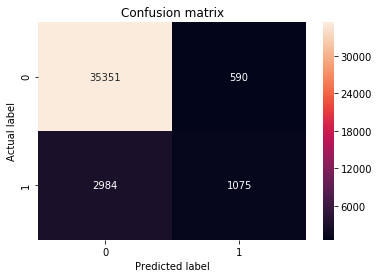

In [0]:
cnf_matrix = confusion_matrix(y_test_list, pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [0]:
######################################################
######### serching for best neuron counts ############
######################################################
la_enc = LabelEncoder()
enc_target = la_enc.fit_transform(target)
target_conv = to_categorical(enc_target)

sets = [[128,64] , [32 , 8], [256,64]]
neu_result = {}

x_train, x_test, y_train, y_test = train_test_split(features, target_conv, test_size = 0.2, random_state=420)

for i in sets:
    print("------------------start DNN-------------------------")  
    model = Sequential()
    model.add(Dense(i[0],input_dim = features.shape[1], activation = "relu"))
    model.add(Dropout(0.4))
    model.add(Dense(i[1], activation = "relu")) # Hidden
    model.add(Dropout(0.3))
    # model.add(Dense(10, activation='relu')) # Hidden
    # model.add(Dropout(0.3))
    model.add(Dense(2, activation='softmax')) # Output

    model.compile(loss='categorical_crossentropy', optimizer="sgd", metrics = ['accuracy'])

    monitor = EarlyStopping(monitor='val_loss', min_delta = 1e-3, patience =4, verbose=2, mode = 'auto')
    checkpoint = ModelCheckpoint(filepath="best_DNN_model_all_{} neuron set".format(i[0]), monitor='val_loss',save_best_only=True)
    print("------------------train DNN-------------------------")
    start = time.time()
    for k in range(5):
      in_st = time.time()
      history = model.fit(x_train, y_train, validation_data= (x_test, y_test), 
                batch_size = 16,callbacks=[monitor,checkpoint],
                verbose=2,epochs=500)
      print("iteration end in time ", time.time() - in_st )

    end_time =  time.time() - start
    print(model.summary())
    #model.load_weights("best_model_DNN.hdf5")
    pickle.dump(model, open("best_DNN_model_all_{} neuron set".format(i),"wb"))
    print("------------------dump DNN Done-------------------------")  
    pred = model.predict(x_test)
    
    pred = np.argmax(pred, axis = 1)
    y_test_list = np.argmax(y_test, axis = 1)

    dnn_result = {
          "Accuracy_score" :accuracy_score(y_test_list, pred),
          "F1_Score" : f1_score(y_test_list,pred, average = "weighted"),
          "Recall_score" : recall_score(y_test_list, pred, average = "weighted"),
          "Precision_score" : precision_score(y_test_list,pred, average = "weighted"),
         "Training time (hr)": end_time/3600,

    }
    neu_result["dnn_with {} and {} neuron set".format(i[0],i[1])] = dnn_result


------------------start DNN-------------------------
------------------train DNN-------------------------
Train on 160000 samples, validate on 40000 samples
Epoch 1/500
 - 27s - loss: 0.2917 - acc: 0.9005 - val_loss: 0.2483 - val_acc: 0.9066
Epoch 2/500
 - 26s - loss: 0.2547 - acc: 0.9064 - val_loss: 0.2408 - val_acc: 0.9101
Epoch 3/500
 - 26s - loss: 0.2462 - acc: 0.9088 - val_loss: 0.2390 - val_acc: 0.9106
Epoch 4/500
 - 27s - loss: 0.2430 - acc: 0.9098 - val_loss: 0.2385 - val_acc: 0.9102
Epoch 5/500
 - 26s - loss: 0.2406 - acc: 0.9102 - val_loss: 0.2378 - val_acc: 0.9105
Epoch 6/500
 - 26s - loss: 0.2380 - acc: 0.9113 - val_loss: 0.2356 - val_acc: 0.9121
Epoch 7/500
 - 27s - loss: 0.2365 - acc: 0.9112 - val_loss: 0.2351 - val_acc: 0.9126
Epoch 8/500
 - 26s - loss: 0.2354 - acc: 0.9122 - val_loss: 0.2360 - val_acc: 0.9114
Epoch 9/500
 - 26s - loss: 0.2335 - acc: 0.9127 - val_loss: 0.2375 - val_acc: 0.9107
Epoch 10/500
 - 28s - loss: 0.2329 - acc: 0.9128 - val_loss: 0.2354 - val_acc:

NameError: ignored

In [0]:
dnn_result = pd.DataFrame(neu_result)
print(dnn_result)
dnn_result.to_csv("dnn_result_neuron_all.csv", index = False)

                    dnn_with 128 and 64 neuron set  \
Accuracy_score                            0.910775   
F1_Score                                  0.884962   
Precision_score                           0.898567   
Recall_score                              0.910775   
Training time (hr)                        0.248264   

                    dnn_with 32 and 8 neuron set  \
Accuracy_score                          0.912750   
F1_Score                                0.891749   
Precision_score                         0.899024   
Recall_score                            0.912750   
Training time (hr)                      0.293504   

                    dnn_with 256 and 64 neuron set  
Accuracy_score                            0.912075  
F1_Score                                  0.890371  
Precision_score                           0.897984  
Recall_score                              0.912075  
Training time (hr)                        0.250373  


Text(0.5, 15.0, 'Predicted label')

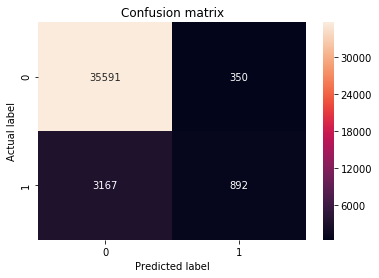

In [0]:
cnf_matrix = confusion_matrix(y_test_list, pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [0]:
results_ = {}
###########################
#########  SVM ############
###########################

x_train,x_test,y_train,y_test = train_test_split(features,target, test_size = 0.2, random_state = 42)

kernel = ["linear", "rbf"] 

for kr in kernel:
  clf = svm.SVC(kernel = kr)
  st = time.time()
  print("------------------train SVM-------------------------")
  svm_clf = clf.fit(x_train,y_train)
  end_time = time.time() - st
  pickle.dump(svm_clf, open(path+"best_SVM_model_all_with_{}.sav".format(kr),"wb"))

  pred = svm_clf.predict(x_test)
  
  print("in svm results ")
  svm_result = {
              "Accuracy_score" : accuracy_score(y_test, pred),
              "F1_Score" : f1_score(y_test,pred, average = "weighted"),
              "Recall_score" : recall_score(y_test, pred, average = "weighted"),
              "Precision_score" : precision_score(y_test,pred, average = "weighted"),
              "Training time (hr)": end_time/3600,
  }

  results_["svm_{}".format(kr)] = svm_result
  print("------------------DONE SVM-------------------------") 
  svm_df = pd.DataFrame(results_)
svm_df.to_csv(path+"svm_result_all.csv", index = False)
svm_df

------------------train SVM-------------------------


### Feature selection with Logistic Regression

In [0]:
clf = LogisticRegression()

In [0]:
start_time = time.time()
clf = clf.fit(x_train,y_train)
end_time = time.time() - start_time

pickle.dump(clf, open("logistic_regression_model_0.sav","wb"))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
print("Time to train Logistic Regression: ", round(end_time,2))

Time to train Logistic Regression:  14.99


In [0]:
pred = clf.predict(x_test)

In [0]:
l = {
    "f1_score" : f1_score(y_test,pred),
    "recall_score" : recall_score(y_test,pred),
    "precsion_score" : precision_score(y_test,pred)
}
l

{'f1_score': 0.4144862242245711,
 'precsion_score': 0.6749435665914221,
 'recall_score': 0.29907476869217303}

In [0]:
imp_features  = [i for i in clf.coef_[0]]
imp_features[:6]

[0.15312669556114972,
 0.20319440861742297,
 0.1608230616894417,
 0.024366467913951636,
 0.0237531396050983,
 0.20802488164641195]

In [0]:
import itertools
feature_imp = pd.DataFrame(sorted(zip(imp_features,x_col.columns),reverse = True),
                           columns = ["Value", "Feature"])

In [0]:
feature_imp

,Value,Feature
0,1.057333,std
1,0.300075,var_90
2,0.267184,var_40
3,0.254495,var_26
4,0.231703,var_118
5,0.230258,var_6
6,0.217514,var_187
7,0.211740,var_99
8,0.208207,var_47
9,0.208025,var_5


In [0]:
feature_imp["color"] = feature_imp.Value > 0

<BarContainer object of 208 artists>

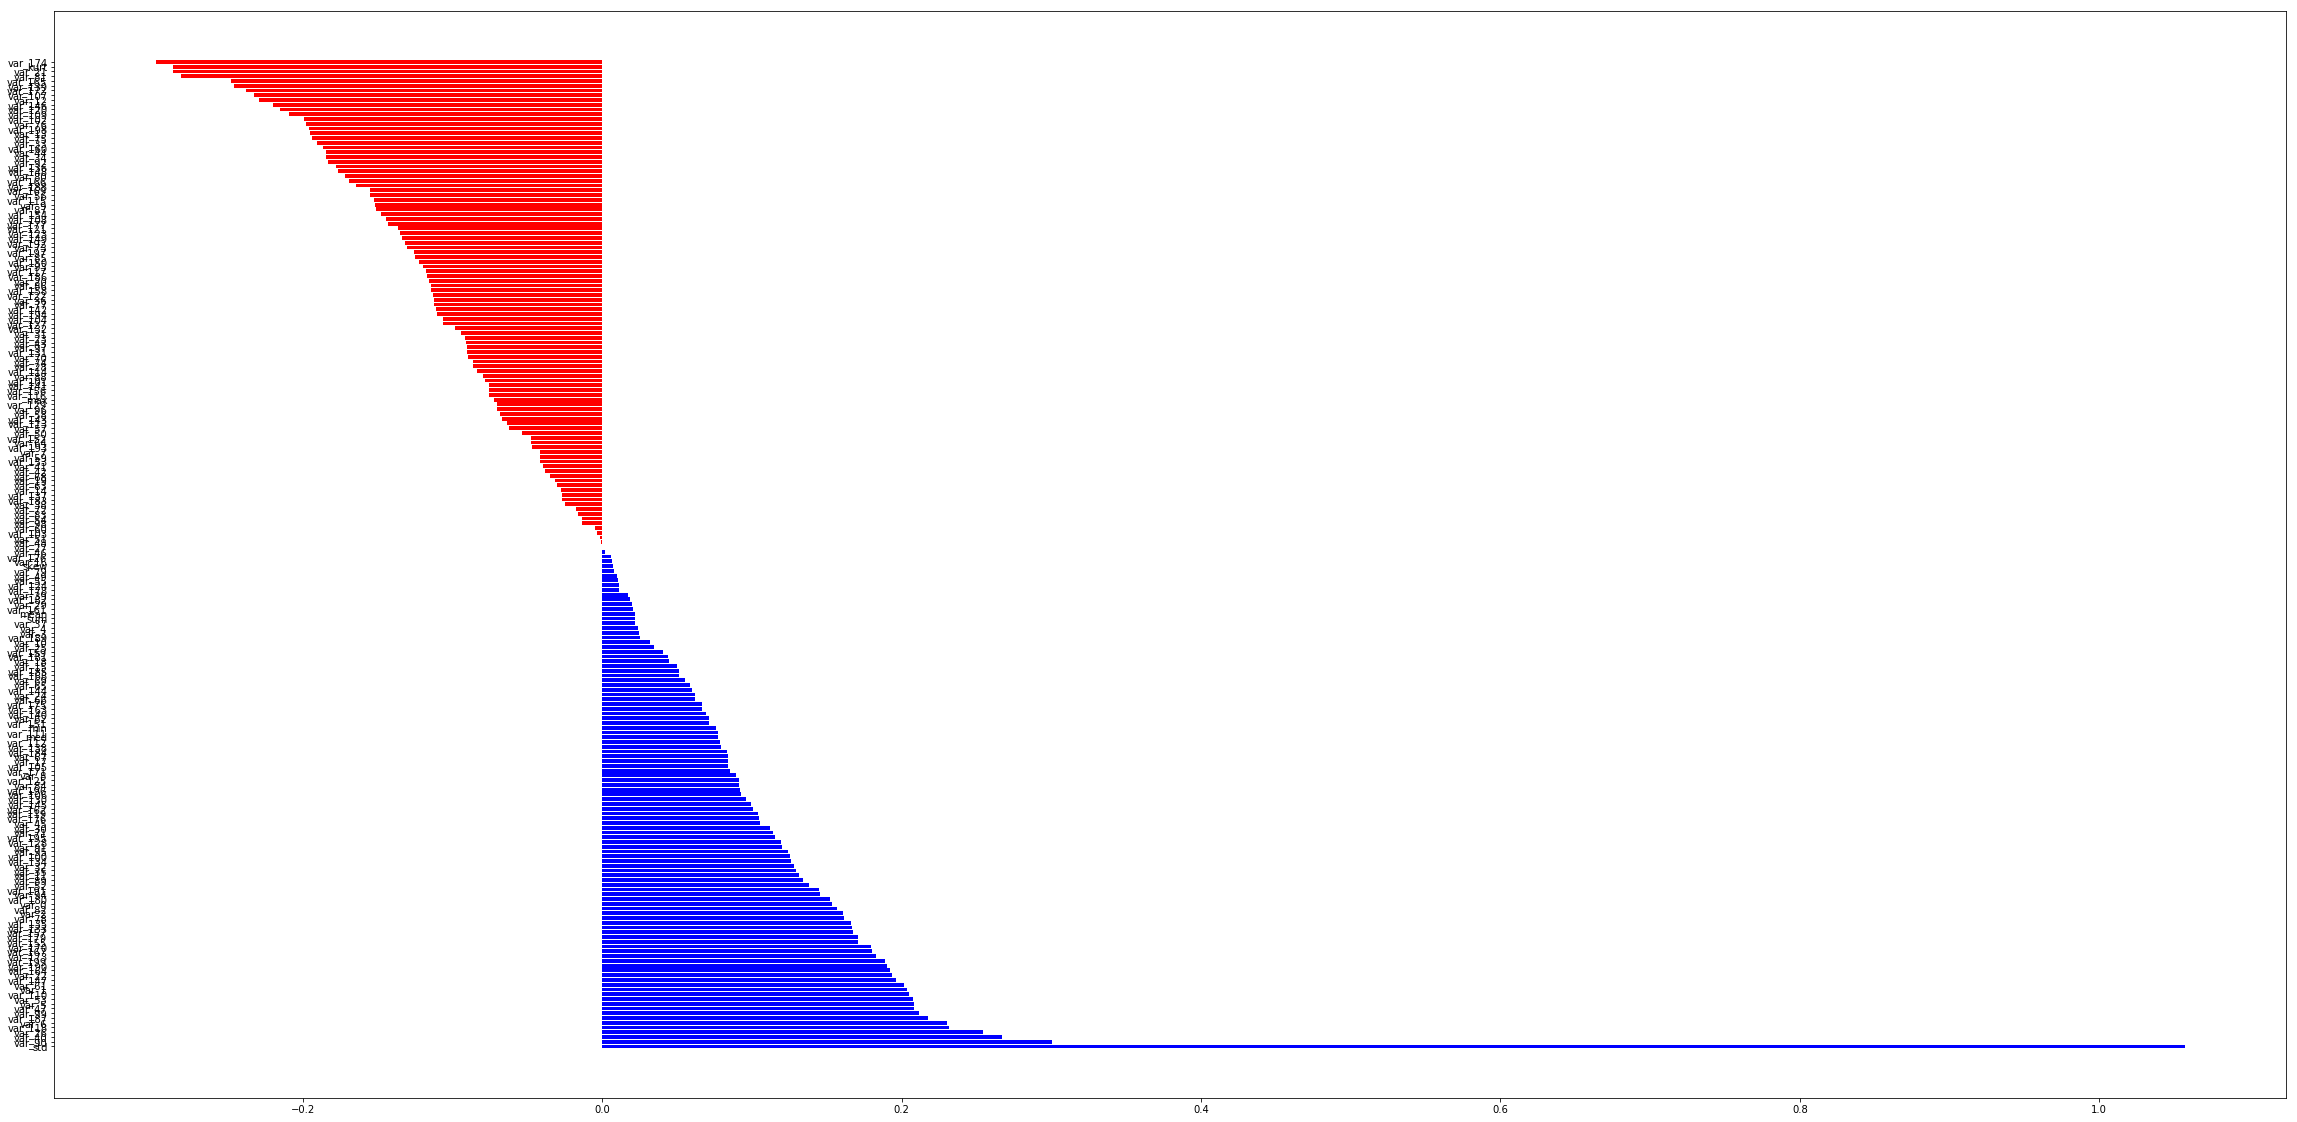

In [0]:
plt.figure(figsize=(40, 20))
plt.barh(feature_imp["Feature"], feature_imp["Value"], align='center',
         ecolor='black', color=feature_imp['color'].map({ True: 'b', False: 'r'}))

In [0]:
selected_features_logistic = feature_imp["Feature"][(feature_imp["Value"] > 0)]

In [0]:
selected_features_logistic.shape

(105,)

In [0]:
selected_features_logistic.to_csv("chosen features with Logistic Regression.csv")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


### Second Method to select features

In [0]:
from sklearn.linear_model import ElasticNet

clf = ElasticNet(alpha=0.1, l1_ratio=0.1)

clf.fit(x_train,y_train)


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
imp_features  = [i for i in clf.coef_]
imp_features[:6]

[0.00500015451215954,
 0.004246268038392625,
 0.0055471498500219854,
 0.0,
 0.0,
 0.0]

In [0]:
import itertools
feature_imp = pd.DataFrame(sorted(zip(imp_features,x_col.columns),reverse = True),
                           columns = ["Value", "Feature"])

In [0]:
feature_imp

,Value,Feature
0,0.008895,var_6
1,0.008283,var_110
2,0.007645,var_53
3,0.006871,var_26
4,0.006558,var_22
5,0.006251,var_99
6,0.005547,var_2
7,0.005522,var_190
8,0.005132,var_133
9,0.005000,var_0


In [0]:
feature_imp["color"] = feature_imp.Value > 0

<BarContainer object of 208 artists>

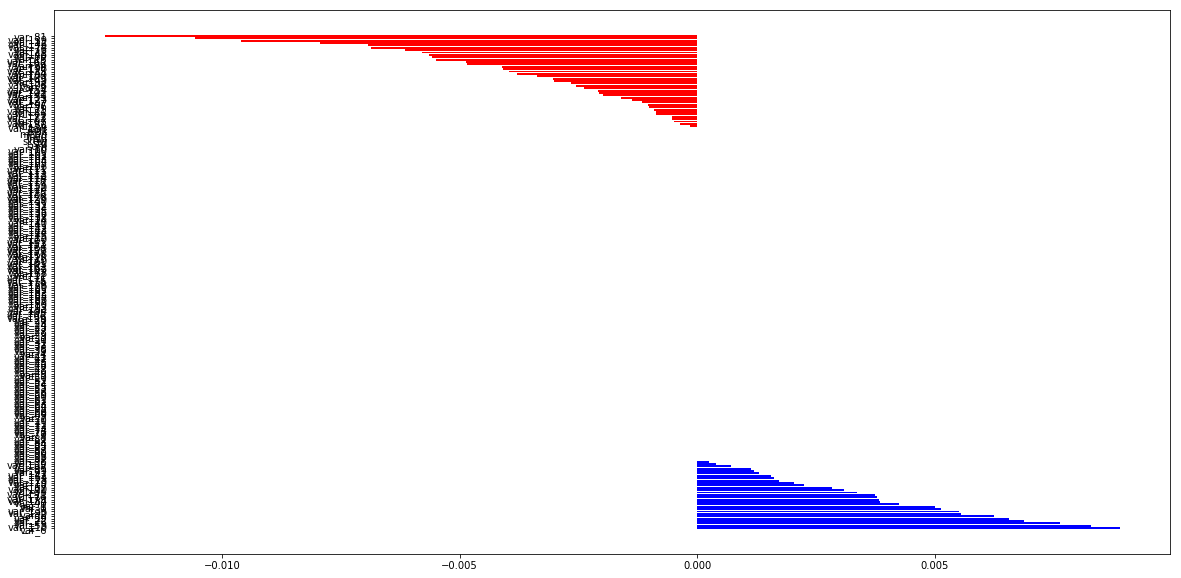

In [0]:
plt.figure(figsize=(20, 10))
plt.barh(feature_imp["Feature"], feature_imp["Value"], align='center',
         ecolor='black', color=feature_imp['color'].map({ True: 'b', False: 'r'}))

In [0]:
selected_features_ElsticNet = feature_imp["Feature"][(feature_imp["Value"] > 0)]

In [0]:
selected_features_ElsticNet.shape

(29,)

In [0]:
selected_features_ElsticNet.to_csv("chosen features with ElasticNet.csv")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


### Selecting Common Features

In [0]:
common_features = []
for i in selected_features_ElsticNet:
  for j in selected_features_logistic:
    if i == j:
      common_features.append(i)

In [0]:
common_features

['var_6',
 'var_110',
 'var_53',
 'var_26',
 'var_22',
 'var_99',
 'var_2',
 'var_190',
 'var_133',
 'var_0',
 'var_1',
 'var_40',
 'var_184',
 'var_179',
 'var_78',
 'var_191',
 'var_94',
 'var_170',
 'var_67',
 'var_18',
 'var_173',
 'var_118',
 'var_164',
 'var_147',
 'var_91',
 'var_89',
 'var_95',
 'var_155',
 'var_35']

In [0]:
cf = pd.DataFrame(common_features, columns = ["top_feature"])
cf.to_csv("common_features.csv")

### Train SVm and Dense Neural Nets on Common Features

In [0]:
common_features = pd.read_csv("common_features.csv")
# common_features = pd.read_csv("common_features.csv")
common_features.head(5)

,Unnamed: 0,top_feature
0,0,var_6
1,1,var_110
2,2,var_53
3,3,var_26
4,4,var_22


In [0]:
common_features.top_feature.head(5)

0      var_6
1    var_110
2     var_53
3     var_26
4     var_22
Name: top_feature, dtype: object

In [0]:
new_df = x_col[common_features.top_feature]
new_df.shape

(200000, 29)

In [0]:
results_ = {}

In [0]:
la_enc = LabelEncoder()
enc_target = la_enc.fit_transform(target)
target_conv = to_categorical(enc_target)

total_activation = ["relu", "sigmoid","tanh"]
optimizers = ["adam","sgd"]

x_train, x_test, y_train, y_test = train_test_split(new_df, target_conv, test_size = 0.2, random_state=420)

for act in total_activation:
  for opt in optimizers:
    print("------------------start DNN-------------------------")  
    model = Sequential()
    model.add(Dense(64,input_dim = new_df.shape[1], activation = act))
    model.add(Dropout(0.4))
    model.add(Dense(8, activation = act)) # Hidden
    model.add(Dropout(0.3))
    # model.add(Dense(10, activation='relu')) # Hidden
    # model.add(Dropout(0.3))
    model.add(Dense(2, activation='softmax')) # Output

    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics = ['accuracy'])

    monitor = EarlyStopping(monitor='val_loss', min_delta = 1e-3, patience =4, verbose=2, mode = 'auto')
    checkpoint = ModelCheckpoint(filepath="extracted_features_optimizer = {} and activation = {}__.hdf5".format(opt,act), monitor='val_loss',save_best_only=True)
    print("------------------train DNN-------------------------")
    start = time.time()
    for i in range(5):
      in_st = time.time()
      history = model.fit(x_train, y_train, validation_data= (x_test, y_test), 
                batch_size = 16,callbacks=[monitor,checkpoint],
                verbose=2,epochs=500)
      print("iteration end in time ", time.time() - in_st )

    end_time =  time.time() - start
    print(model.summary())
    #model.load_weights("best_model_DNN.hdf5")
    pickle.dump(model, open("extracted_features_optimizer = {} and activation = {}__.sav".format(opt,act),"wb"))
    print("------------------dump DNN Done-------------------------")  
    pred = model.predict(x_test)
    
    pred = np.argmax(pred, axis = 1)
    y_test_list = np.argmax(y_test, axis = 1)

    dnn_result = {
          "Accuracy_score" :accuracy_score(y_test_list, pred),
          "F1_Score" : f1_score(y_test_list,pred, average = "weighted"),
          "Recall_score" : recall_score(y_test_list, pred, average = "weighted"),
          "Precision_score" : precision_score(y_test_list,pred, average = "weighted"),
         "Training time (hr)": end_time/3600,

    }
    results_["dnn_with activation = {} & optimizer = {}".format(act,opt)] = dnn_result
dnn_result = pd.DataFrame(results_)
print(dnn_result)
dnn_result.to_csv("dnn_result.csv", index = False)

------------------start DNN-------------------------
------------------train DNN-------------------------
Train on 160000 samples, validate on 40000 samples
Epoch 1/500
 - 35s - loss: 0.3303 - acc: 0.8989 - val_loss: 0.3116 - val_acc: 0.8985
Epoch 2/500
 - 36s - loss: 0.3124 - acc: 0.8998 - val_loss: 0.3118 - val_acc: 0.8985
Epoch 3/500
 - 34s - loss: 0.3104 - acc: 0.8996 - val_loss: 0.3078 - val_acc: 0.8985
Epoch 4/500
 - 35s - loss: 0.3086 - acc: 0.8996 - val_loss: 0.3072 - val_acc: 0.8985
Epoch 5/500
 - 34s - loss: 0.3084 - acc: 0.8998 - val_loss: 0.3067 - val_acc: 0.8985
Epoch 6/500
 - 36s - loss: 0.3073 - acc: 0.8997 - val_loss: 0.3058 - val_acc: 0.8985
Epoch 7/500
 - 34s - loss: 0.3072 - acc: 0.8995 - val_loss: 0.3056 - val_acc: 0.8986
Epoch 8/500
 - 35s - loss: 0.3062 - acc: 0.8997 - val_loss: 0.3041 - val_acc: 0.8986
Epoch 9/500
 - 35s - loss: 0.3062 - acc: 0.8996 - val_loss: 0.3074 - val_acc: 0.8985
Epoch 10/500
 - 35s - loss: 0.3059 - acc: 0.8994 - val_loss: 0.3040 - val_acc:

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


------------------start DNN-------------------------
------------------train DNN-------------------------
Train on 160000 samples, validate on 40000 samples
Epoch 1/500
 - 33s - loss: 0.3227 - acc: 0.8992 - val_loss: 0.3121 - val_acc: 0.8985
Epoch 2/500
 - 35s - loss: 0.3125 - acc: 0.8998 - val_loss: 0.3115 - val_acc: 0.8985
Epoch 3/500
 - 33s - loss: 0.3112 - acc: 0.8998 - val_loss: 0.3099 - val_acc: 0.8985
Epoch 4/500
 - 33s - loss: 0.3103 - acc: 0.8998 - val_loss: 0.3090 - val_acc: 0.8985
Epoch 5/500
 - 35s - loss: 0.3097 - acc: 0.8998 - val_loss: 0.3086 - val_acc: 0.8985
Epoch 6/500
 - 35s - loss: 0.3095 - acc: 0.8998 - val_loss: 0.3082 - val_acc: 0.8985
Epoch 7/500
 - 36s - loss: 0.3087 - acc: 0.8998 - val_loss: 0.3076 - val_acc: 0.8985
Epoch 8/500
 - 33s - loss: 0.3086 - acc: 0.8998 - val_loss: 0.3100 - val_acc: 0.8985
Epoch 9/500
 - 34s - loss: 0.3089 - acc: 0.8998 - val_loss: 0.3083 - val_acc: 0.8985
Epoch 10/500
 - 33s - loss: 0.3083 - acc: 0.8998 - val_loss: 0.3082 - val_acc:

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


------------------start DNN-------------------------
------------------train DNN-------------------------
Train on 160000 samples, validate on 40000 samples
Epoch 1/500
 - 28s - loss: 0.3289 - acc: 0.8983 - val_loss: 0.3177 - val_acc: 0.8985
Epoch 2/500
 - 29s - loss: 0.3172 - acc: 0.8998 - val_loss: 0.3134 - val_acc: 0.8985
Epoch 3/500
 - 28s - loss: 0.3144 - acc: 0.8998 - val_loss: 0.3119 - val_acc: 0.8985
Epoch 4/500
 - 28s - loss: 0.3126 - acc: 0.8998 - val_loss: 0.3112 - val_acc: 0.8985
Epoch 5/500
 - 29s - loss: 0.3117 - acc: 0.8998 - val_loss: 0.3100 - val_acc: 0.8985
Epoch 6/500
 - 28s - loss: 0.3109 - acc: 0.8998 - val_loss: 0.3097 - val_acc: 0.8985
Epoch 7/500
 - 28s - loss: 0.3100 - acc: 0.8998 - val_loss: 0.3082 - val_acc: 0.8985
Epoch 8/500
 - 30s - loss: 0.3093 - acc: 0.8998 - val_loss: 0.3086 - val_acc: 0.8985
Epoch 9/500
 - 29s - loss: 0.3090 - acc: 0.8998 - val_loss: 0.3086 - val_acc: 0.8985
Epoch 10/500
 - 28s - loss: 0.3080 - acc: 0.8998 - val_loss: 0.3076 - val_acc:

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0.5, 15.0, 'Predicted label')

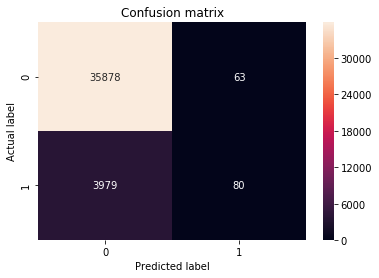

In [0]:
#
cnf_matrix = confusion_matrix(y_test_list, pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [0]:
######################################################
######### serching for best neuron counts ############
######################################################
la_enc = LabelEncoder()
enc_target = la_enc.fit_transform(target)
target_conv = to_categorical(enc_target)

sets = [[128,64] , [32 , 8], [256,64]]
neu_result = {}

x_train, x_test, y_train, y_test = train_test_split(new_df, target_conv, test_size = 0.2, random_state=420)

for i in sets:
    print("------------------start DNN-------------------------")  
    model = Sequential()
    model.add(Dense(i[0],input_dim = new_df.shape[1], activation = "relu"))
    model.add(Dropout(0.4))
    model.add(Dense(i[1], activation = "relu")) # Hidden
    model.add(Dropout(0.3))
    # model.add(Dense(10, activation='relu')) # Hidden
    # model.add(Dropout(0.3))
    model.add(Dense(2, activation='softmax')) # Output

    model.compile(loss='categorical_crossentropy', optimizer="sgd", metrics = ['accuracy'])

    monitor = EarlyStopping(monitor='val_loss', min_delta = 1e-3, patience =4, verbose=2, mode = 'auto')
    checkpoint = ModelCheckpoint(filepath="best_DNN_model_ext_{} neuron set".format(i[0]), monitor='val_loss',save_best_only=True)
    print("------------------train DNN-------------------------")
    start = time.time()
    for k in range(5):
      in_st = time.time()
      history = model.fit(x_train, y_train, validation_data= (x_test, y_test), 
                batch_size = 16,callbacks=[monitor,checkpoint],
                verbose=2,epochs=500)
      print("iteration end in time ", time.time() - in_st )

    end_time =  time.time() - start
    print(model.summary())
    #model.load_weights("best_model_DNN.hdf5")
    pickle.dump(model, open("best_DNN_model_ext_{} neuron set".format(i),"wb"))
    print("------------------dump DNN Done-------------------------")  
    pred = model.predict(x_test)
    
    pred = np.argmax(pred, axis = 1)
    y_test_list = np.argmax(y_test, axis = 1)

    dnn_result = {
          "Accuracy_score" :accuracy_score(y_test_list, pred),
          "F1_Score" : f1_score(y_test_list,pred, average = "weighted"),
          "Recall_score" : recall_score(y_test_list, pred, average = "weighted"),
          "Precision_score" : precision_score(y_test_list,pred, average = "weighted"),
         "Training time (hr)": end_time/3600,

    }
    neu_result["dnn_with {} and {} neuron set".format(i[0],i[1])] = dnn_result
dnn_result = pd.DataFrame(neu_result)
print(dnn_result)
dnn_result.to_csv("dnn_result_neuron_ext.csv", index = False)

------------------start DNN-------------------------
------------------train DNN-------------------------
Train on 160000 samples, validate on 40000 samples
Epoch 1/500
 - 28s - loss: 0.3328 - acc: 0.8988 - val_loss: 0.3157 - val_acc: 0.8985
Epoch 2/500
 - 28s - loss: 0.3135 - acc: 0.8997 - val_loss: 0.3133 - val_acc: 0.8985
Epoch 3/500
 - 26s - loss: 0.3107 - acc: 0.8997 - val_loss: 0.3120 - val_acc: 0.8985
Epoch 4/500
 - 26s - loss: 0.3082 - acc: 0.8997 - val_loss: 0.3099 - val_acc: 0.8986
Epoch 5/500
 - 27s - loss: 0.3071 - acc: 0.8996 - val_loss: 0.3076 - val_acc: 0.8986
Epoch 6/500
 - 26s - loss: 0.3057 - acc: 0.8996 - val_loss: 0.3062 - val_acc: 0.8986
Epoch 7/500
 - 26s - loss: 0.3047 - acc: 0.8997 - val_loss: 0.3059 - val_acc: 0.8986
Epoch 8/500
 - 27s - loss: 0.3042 - acc: 0.8997 - val_loss: 0.3083 - val_acc: 0.8986
Epoch 9/500
 - 26s - loss: 0.3038 - acc: 0.8997 - val_loss: 0.3066 - val_acc: 0.8986
Epoch 10/500
 - 26s - loss: 0.3031 - acc: 0.8997 - val_loss: 0.3084 - val_acc:

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


------------------start DNN-------------------------
------------------train DNN-------------------------
Train on 160000 samples, validate on 40000 samples
Epoch 1/500
 - 26s - loss: 0.3311 - acc: 0.8991 - val_loss: 0.3152 - val_acc: 0.8985
Epoch 2/500
 - 27s - loss: 0.3136 - acc: 0.8996 - val_loss: 0.3123 - val_acc: 0.8985
Epoch 3/500
 - 28s - loss: 0.3104 - acc: 0.8996 - val_loss: 0.3112 - val_acc: 0.8985
Epoch 4/500
 - 27s - loss: 0.3088 - acc: 0.8995 - val_loss: 0.3109 - val_acc: 0.8985
Epoch 5/500
 - 26s - loss: 0.3067 - acc: 0.8997 - val_loss: 0.3066 - val_acc: 0.8986
Epoch 6/500
 - 28s - loss: 0.3056 - acc: 0.8996 - val_loss: 0.3093 - val_acc: 0.8985
Epoch 7/500
 - 26s - loss: 0.3051 - acc: 0.8997 - val_loss: 0.3038 - val_acc: 0.8988
Epoch 8/500
 - 26s - loss: 0.3042 - acc: 0.8996 - val_loss: 0.3042 - val_acc: 0.8986
Epoch 9/500
 - 27s - loss: 0.3033 - acc: 0.8998 - val_loss: 0.3048 - val_acc: 0.8985
Epoch 10/500
 - 26s - loss: 0.3027 - acc: 0.8997 - val_loss: 0.3044 - val_acc:

In [0]:
results_ = {}
###########################
#########  SVM ############
###########################
x_train,x_test,y_train,y_test = train_test_split(new_df,target, test_size = 0.2, random_state = 42)

kernel = ["rbf"] 

for kr in kernel:
  clf = svm.SVC(kernel = kr)
  st = time.time()
  print("------------------train SVM-------------------------")
  svm_clf = clf.fit(x_train,y_train)
  end_time = time.time() - st
  pickle.dump(svm_clf, open("best_SVM_model_ext_feat_{}.sav".format(kr),"wb"))

  pred = svm_clf.predict(x_test)
  
  print("in svm results ")
  svm_result = {
              "Accuracy_score" : accuracy_score(y_test, pred),
              "F1_Score" : f1_score(y_test,pred, average = "weighted"),
              "Recall_score" : recall_score(y_test, pred, average = "weighted"),
              "Precision_score" : precision_score(y_test,pred, average = "weighted"),
              "Training time (hr)": end_time/3600
  }

  results_["svm_{}".format(kr)] = svm_result
  
svm_df = pd.DataFrame(results_)
svm_df.to_csv( "ext_feat_result.csv", index = False)
svm_df

------------------train SVM-------------------------
in svm results 


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,svm_rbf
Accuracy_score,0.897575
F1_Score,0.849127
Precision_score,0.805641
Recall_score,0.897575
Training time (hr),2.194000


Text(0.5, 15.0, 'Predicted label')

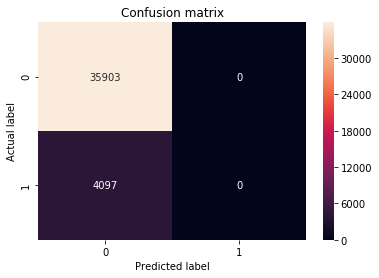

In [0]:
cnf_matrix = confusion_matrix(y_test, pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')